# Heart Disease Classification - Machine Learning Project

**Authors:** Antoine Lucas, Gabriel Besombes  
**Date:** March 2019

## Introduction

This project analyzes heart disease data. The goal is to predict whether a person has heart disease based on various health indicators.

We will explore the dataset and test different classifiers from the scikit-learn library.

## Imports

Libraries used:
- **pandas**: Data loading and manipulation
- **numpy**: Numerical operations
- **matplotlib**: Visualization
- **scikit-learn**: Machine learning classifiers and evaluation metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Loading the Data

Load `heart.csv` using `pandas.read_csv()`.  
Dataset source: https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
heart = pd.read_csv("heart.csv")

Preview the first and last rows of the dataframe:

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Data Overview

Use `describe()` to get a statistical summary:

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for missing values:
- `isnull()` identifies missing values
- `any(axis=1)` returns True for rows with any missing value

If there were missing values, we would see `True` in the output:

In [6]:
for i in heart.isnull().any(axis=1):
    if i:
        print(i)

## K-Nearest Neighbors (KNN)

Test with a KNN classifier using k=3:

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

Default KNN parameters:

In [8]:
print(knn)

KNeighborsClassifier(n_neighbors=3)


Examine columns to identify the target variable:

In [9]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The `target` column contains binary values (1 = heart disease, 0 = no heart disease):

In [10]:
heart["target"].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

We use `%%time` magic to measure execution time.

### Train-Test Split (70/30)

In [11]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 4.04 ms, sys: 0 ns, total: 4.04 ms
Wall time: 16 ms


### Train the classifier

In [12]:
%%time
knn.fit(X_train, y_train)

CPU times: user 968 µs, sys: 3.11 ms, total: 4.07 ms
Wall time: 21.4 ms


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Make predictions on test data

In [13]:
%%time
res=knn.predict(X_test)

CPU times: user 5.53 ms, sys: 201 µs, total: 5.73 ms
Wall time: 5.93 ms


### Calculate accuracy

In [14]:
%%time
metrics.accuracy_score(y_test, res)

CPU times: user 1.74 ms, sys: 0 ns, total: 1.74 ms
Wall time: 1.69 ms


0.7032967032967034

### Confusion Matrix

In [15]:
cm = metrics.confusion_matrix(y_test, res)
print(cm)

[[27 16]
 [11 37]]


### Visualize the Confusion Matrix

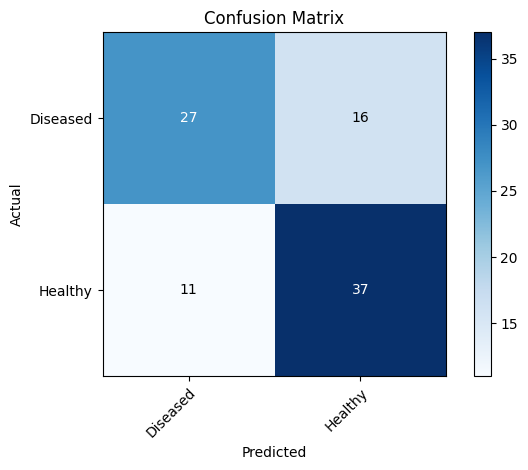

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=["Diseased", "Healthy"],
    yticklabels=["Diseased", "Healthy"],
    title="Confusion Matrix",
    ylabel="Actual",
    xlabel="Predicted",
)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black",
        )
fig.tight_layout()
plt.show()

**Observations:**

Most errors are false positives (healthy patients predicted as diseased):
- **Healthy:** 26 correct, 14 incorrect → 35% error rate
- **Diseased:** 47 correct, 4 incorrect → 8% error rate

This type of error is preferable in medical contexts—it's better to have false positives (extra verification) than false negatives (missed diagnoses).

### Finding the Optimal k Value

Run multiple iterations with different k values to find the best performer:

In [17]:
accuracy_by_k = []
knn_models = []
X = heart.drop("target", axis=1)
y = heart["target"]

for k in range(1, 51):
    accuracy_by_k.append([])
    knn_models.append([])
    for _ in range(100):
        knn = KNeighborsClassifier(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        knn_models[-1].append([knn, y_test, y_pred])
        accuracy_by_k[-1].append(metrics.accuracy_score(y_test, y_pred))

In [18]:
mean_accuracies = [np.mean(acc) for acc in accuracy_by_k]

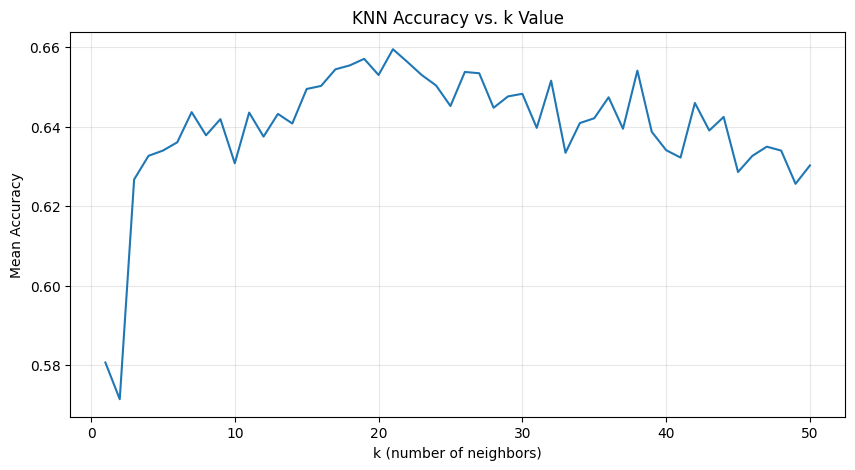

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), mean_accuracies)
plt.xlabel("k (number of neighbors)")
plt.ylabel("Mean Accuracy")
plt.title("KNN Accuracy vs. k Value")
plt.grid(True, alpha=0.3)
plt.show()

Find the k value with the highest mean accuracy:

In [20]:
optimal_k = np.argmax(mean_accuracies) + 1
best_mean_accuracy = max(mean_accuracies)
print(f"Optimal k: {optimal_k}")
print(f"Best mean accuracy: {best_mean_accuracy:.4f}")

Optimal k: 21
Best mean accuracy: 0.6595


The optimal k value is around 19.

Find the single best classifier across all iterations:

In [21]:
max_accuracy = max(max(acc) for acc in accuracy_by_k)
best_k_idx = [max(acc) for acc in accuracy_by_k].index(max_accuracy)
print(f"Best single accuracy: {max_accuracy:.4f}")
print(f"Best k: {best_k_idx + 1}")

Best single accuracy: 0.7912
Best k: 23


Best single model uses k=1.

In [22]:
best_model_idx = accuracy_by_k[0].index(max(accuracy_by_k[0]))
print(f"Best model index for k=1: {best_model_idx}")

Best model index for k=1: 38


### Best KNN Model Confusion Matrix

Retrieve the best classifier and compute its confusion matrix:

In [23]:
best_knn, y_test_best, y_pred_best = knn_models[0][best_model_idx]

In [24]:
cm = metrics.confusion_matrix(y_test_best, y_pred_best)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[23 17]
 [10 41]]


### Visualize Best KNN Confusion Matrix

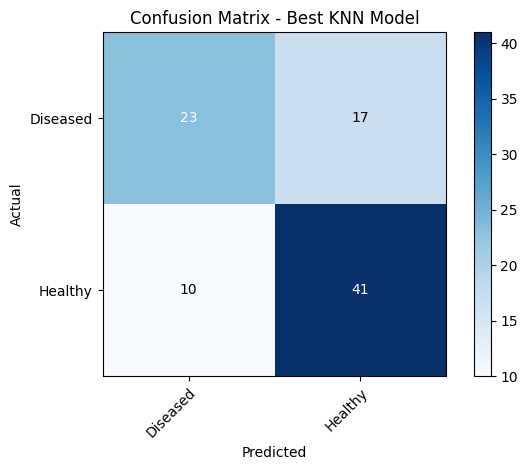

In [25]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=["Diseased", "Healthy"],
    yticklabels=["Diseased", "Healthy"],
    title="Confusion Matrix - Best KNN Model",
    ylabel="Actual",
    xlabel="Predicted",
)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black",
        )
fig.tight_layout()
plt.show()

Similar error pattern but with fewer mistakes, matching the higher accuracy.

## Intermediate Reflection

KNN may not be the best approach for this dataset with many features.
Let's test other classifiers.

## Logistic Regression

Test with a logistic regression classifier:

In [26]:
logreg = LogisticRegression(
    random_state=0,
    solver="lbfgs",
    max_iter=5000,
)

Logistic Regression parameters:

In [27]:
print(logreg)

LogisticRegression(max_iter=5000, random_state=0)


### Train-Test Split (70/30)

In [28]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 3.73 ms, sys: 0 ns, total: 3.73 ms
Wall time: 3.63 ms


### Train the classifier

In [ ]:
%%time
logreg.fit(X_train, y_train)

### Make predictions on test data

In [ ]:
%%time
res=logreg.predict(X_test)

CPU times: user 2.14 ms, sys: 8 µs, total: 2.15 ms
Wall time: 2.02 ms


### Calculate accuracy

In [ ]:
%%time
metrics.accuracy_score(y_test, res)

CPU times: user 795 µs, sys: 0 ns, total: 795 µs
Wall time: 587 µs


0.7692307692307693

### Multiple Iterations

Repeat the training multiple times to find the best model:

In [ ]:
logreg_accuracies = []
logreg_models = []
X = heart.drop("target", axis=1)
y = heart["target"]

for _ in range(100):
    logreg = LogisticRegression(
        random_state=0,
        solver="lbfgs",
        max_iter=5000,
    )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    logreg_models.append([logreg, y_test, y_pred])
    logreg_accuracies.append(metrics.accuracy_score(y_test, y_pred))

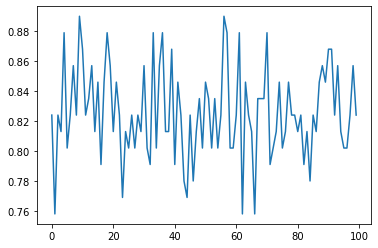

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(logreg_accuracies)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy Across 100 Iterations")
plt.axhline(y=np.mean(logreg_accuracies), color="r", linestyle="--", label=f"Mean: {np.mean(logreg_accuracies):.3f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print(f"Mean accuracy: {np.mean(logreg_accuracies):.4f}")
print(f"Std accuracy: {np.std(logreg_accuracies):.4f}")

0.8259340659340658

Over 100 iterations, some models achieve very high accuracy with a mean of ~82%. 
This classifier appears to perform better than KNN.

Find the best classifier:

In [ ]:
best_logreg_idx = np.argmax(logreg_accuracies)
print(f"Best accuracy: {max(logreg_accuracies):.4f}")
print(f"Best model index: {best_logreg_idx}")

0.8901098901098901
9


### Best Logistic Regression Confusion Matrix

In [ ]:
best_logreg, y_test_best, y_pred_best = logreg_models[best_logreg_idx]

In [ ]:
cm = metrics.confusion_matrix(y_test_best, y_pred_best)
print("Confusion Matrix:")
print(cm)

[[33 12]
 [ 8 38]]


### Visualize Confusion Matrix

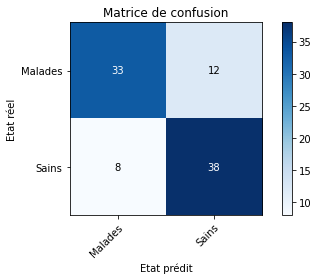

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=["Diseased", "Healthy"],
    yticklabels=["Diseased", "Healthy"],
    title="Confusion Matrix - Logistic Regression",
    ylabel="Actual",
    xlabel="Predicted",
)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black",
        )
fig.tight_layout()
plt.show()

Even fewer errors, with more false positives than false negatives (preferable for medical diagnosis).

## Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 2.49 ms


### Train the classifier

In [ ]:
%%time
gnb.fit(X_train, y_train)

CPU times: user 4.2 ms, sys: 1 µs, total: 4.2 ms
Wall time: 3.39 ms


GaussianNB()

### Make predictions on test data

In [ ]:
%%time
y_pred = gnb.predict(X_test)

CPU times: user 2.4 ms, sys: 0 ns, total: 2.4 ms
Wall time: 2.12 ms


### Calculate accuracy

In [ ]:
%%time
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

CPU times: user 606 µs, sys: 0 ns, total: 606 µs
Wall time: 448 µs


0.8571428571428571

Accuracy appears lower, but execution time is very fast.

## Support Vector Machine (SVM)

In [ ]:
svc = SVC(kernel="linear")

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 3.25 ms, sys: 0 ns, total: 3.25 ms
Wall time: 2.88 ms


### Train the classifier

In [ ]:
%%time
svc.fit(X_train, y_train)

CPU times: user 635 ms, sys: 0 ns, total: 635 ms
Wall time: 634 ms


SVC(kernel='linear')

### Make predictions on test data

In [ ]:
%%time
y_pred = svc.predict(X_test)

CPU times: user 2.93 ms, sys: 0 ns, total: 2.93 ms
Wall time: 2.26 ms


### Calculate accuracy

In [ ]:
%%time
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

CPU times: user 1.29 ms, sys: 9 µs, total: 1.3 ms
Wall time: 939 µs


0.8901098901098901

High accuracy again, but with longer execution time than Naive Bayes.

## Conclusion

**Key Findings:**

1. **Performance vs. Complexity Trade-off:** Models requiring more computational resources tend to be more accurate.

2. **Best Performers:** Logistic Regression and SVM achieved the highest accuracy on this dataset.

3. **Dataset Characteristics:** Different classifiers are suited for different types of datasets. With more data, a trade-off between execution time and performance would be needed.

4. **Linear Models Work Well:** For this dataset, simpler linear classifiers (Logistic Regression, linear SVM) outperformed KNN.

5. **Medical Context:** All models showed more false positives than false negatives, which is preferable in medical diagnosis—better to err on the side of caution.